<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-data" data-toc-modified-id="Read-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Prepare-Labels" data-toc-modified-id="Prepare-Labels-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare Labels</a></span><ul class="toc-item"><li><span><a href="#Number-of-images-have-buildings" data-toc-modified-id="Number-of-images-have-buildings-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Number of images have buildings</a></span></li><li><span><a href="#Remove-images-not-(64,64,3)-shape" data-toc-modified-id="Remove-images-not-(64,64,3)-shape-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Remove images not (64,64,3) shape</a></span></li></ul></li></ul></div>

## Read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,glob

In [2]:
excel_dir = '../'
image_dir = '../Data/img/Split-Raster'
pattern = '*.TIF'
img_lst = glob.glob(os.path.join(image_dir,pattern))
len(img_lst)

178374

In [3]:
%%time 
img = plt.imread(img_lst[0])

Wall time: 31.7 ms


(64, 64, 3)


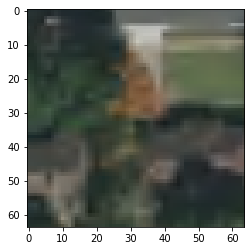

In [4]:
print(img.shape)
plt.imshow(img)

In [5]:
img

array([[[ 38,  50,  51],
        [ 38,  49,  50],
        [ 38,  48,  50],
        ...,
        [ 95, 102, 102],
        [ 94, 101, 102],
        [ 92, 100, 100]],

       [[ 40,  52,  52],
        [ 40,  50,  50],
        [ 39,  49,  49],
        ...,
        [ 96, 103, 102],
        [ 95, 102, 102],
        [ 94, 100, 100]],

       [[ 38,  50,  49],
        [ 38,  48,  48],
        [ 38,  47,  46],
        ...,
        [ 95, 102, 100],
        [ 92,  99,  99],
        [ 90,  96,  96]],

       ...,

       [[ 32,  44,  43],
        [ 30,  42,  40],
        [ 28,  40,  37],
        ...,
        [ 48,  62,  50],
        [ 49,  64,  50],
        [ 46,  60,  48]],

       [[ 32,  45,  42],
        [ 32,  44,  41],
        [ 31,  44,  40],
        ...,
        [ 58,  73,  58],
        [ 62,  78,  62],
        [ 56,  71,  56]],

       [[ 32,  46,  42],
        [ 33,  47,  42],
        [ 34,  48,  42],
        ...,
        [ 68,  83,  66],
        [ 75,  91,  73],
        [ 66,  81,  64]]

## Prepare Labels

In [6]:
pattern  = '*.xlsx'
excel_lst = glob.glob(os.path.join(excel_dir,pattern))
excel_lst[:5]

['..\\Labeled-proc0.xlsx',
 '..\\Labeled-proc1.xlsx',
 '..\\Labeled-proc10.xlsx',
 '..\\Labeled-proc11.xlsx',
 '..\\Labeled-proc12.xlsx']

In [7]:
df = pd.read_excel(excel_lst[0])
df.head()

,Unnamed: 0,file_name,y_label
0,0,Cliped-Dallas-Img0.TIF,True
1,1,Cliped-Dallas-Img1.TIF,True
2,2,Cliped-Dallas-Img10.TIF,True
3,3,Cliped-Dallas-Img100.TIF,False
4,4,Cliped-Dallas-Img1000.TIF,True


In [8]:
%%time
for table in excel_lst[1:]:
    df_new = pd.read_excel(table)
    df = pd.concat([df,df_new])
del df['Unnamed: 0']
df.drop_duplicates(inplace=True)
df.shape

Wall time: 8.67 s


(178374, 2)

### Number of images have buildings

In [9]:
df.y_label.sum()

99997

In [10]:
# %%time
# img_training = [plt.imread(os.path.join(image_dir,x)) for x in df.file_name[:200]]
# img_testing = [plt.imread(os.path.join(image_dir,x)) for x in df.file_name[201:400]]

Wall time: 333 ms


### Remove images not (64,64,3) shape

In [11]:
%%time
singular_lst = []
for x in df.file_name:
    img = plt.imread(os.path.join(image_dir,x))
    if img.shape != (64,64,3):
        singular_lst.append(x)

Wall time: 4min 44s


In [12]:
len(singular_lst)

342

In [13]:
index_lst = [index for index,x in enumerate(df.file_name) if x in singular_lst]
index_lst[:5]

[40, 618, 1197, 1775, 2355]

In [14]:
new_df = df.drop(df.index[index_lst])

In [15]:
new_df.shape

(173244, 2)

In [16]:
compression_opts = dict(method='zip',archive_name='out.csv')  
new_df.to_csv('out.zip',compression=compression_opts) 